### Finding files and data using Data Connect

#### Learning Objectives
Workshop attendees will learn how use the GA4GH Data Connect Service.  

What will participants do as part of the exercise?

 - Understanding how to query data via Data Connect
 - Use Data Connect to find files that can be accessed via DRS
 - Learn how to obtain and use data deacriptions (schema)
 - Discover the meaning of codes used in data
 

 #### Icons in this Guide

 🖐 A hands-on section where you will code something or interact with the server
 📘 A link to a useful external reference related to the section the icon appears in
 
 
 #### Start Data Connect Server 

Start Docker

In a terminal window, start the Session 2 Data Connect application

```
cd ismb-2022-ga4gh-tutorial/sessions/session2 
docker-compose up -d
```

If you are running Docker Desktop you should see something like the following

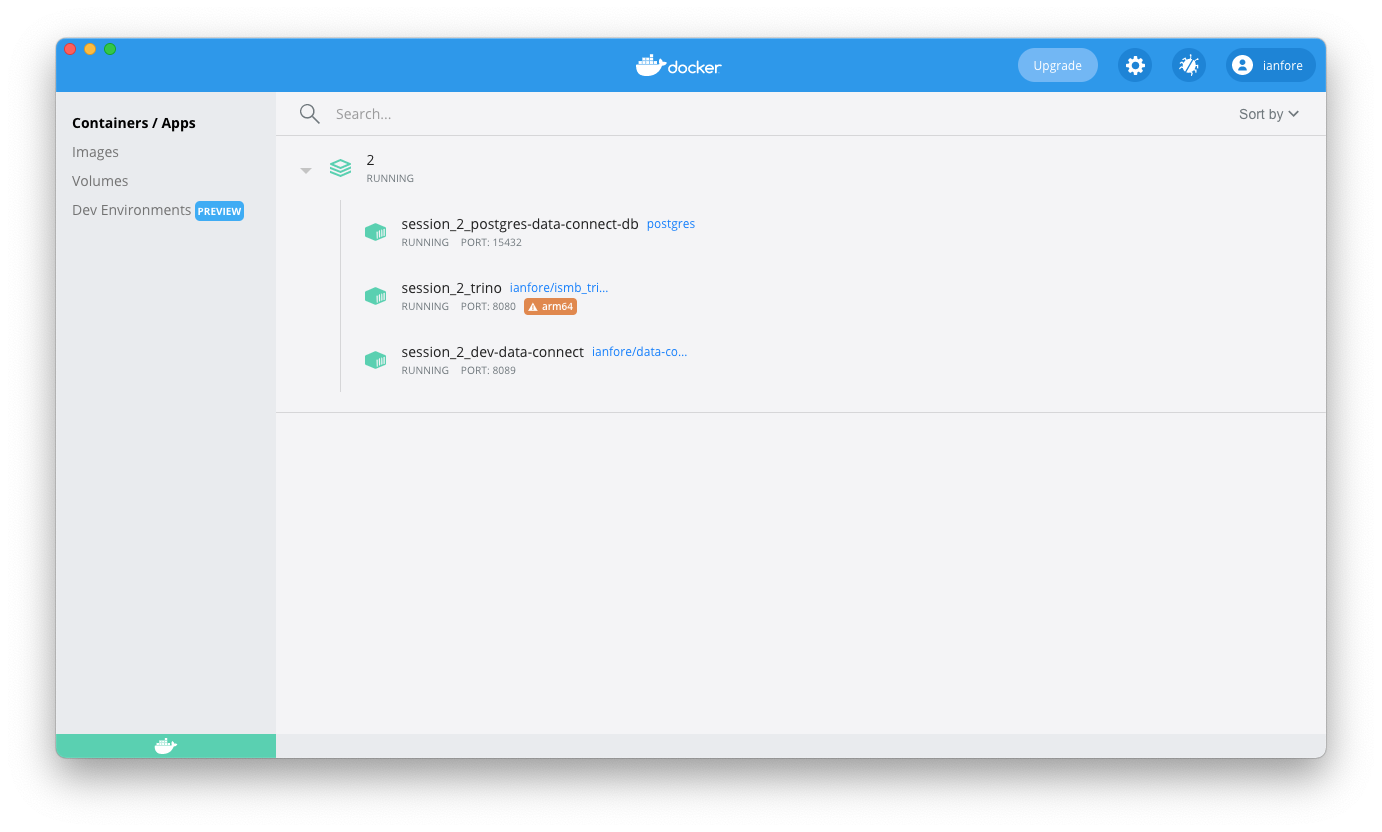

Alternatively, type the following at a command line

```
docker ps
```

 


📘 [Data Connect Specification](https://github.com/ga4gh-discovery/data-connect/blob/develop/SPEC.md)

### Query files
The approach taken below is using mapping is available through subject and specimen data available through the Data Connect API. 

In [1]:
from fasp.search import DataConnectClient

# Step 1 - Discovery
# query for relevant DRS objects
searchClient = DataConnectClient('http://localhost:8089/', debug=False)



In [6]:
query = '''SELECT f.sample_name, drs_id bam_drs_id, acc
FROM tutorial.onek_genomes.ssd_drs s 
join tutorial.onek_genomes.sra_drs_files f on f.sample_name = s.su_submitter_id 
where filetype = 'bam' and mapped = 'mapped' 
and sequencing_type ='exome' and  population = 'JPT' LIMIT 3'''

resultRows = searchClient.run_query(query, returnType='dataframe')
resultRows

Retrieving the query
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________
____Page9_______________
____Page10_______________
____Page11_______________
____Page12_______________
____Page13_______________
____Page14_______________
____Page15_______________
____Page16_______________
____Page17_______________
____Page18_______________
____Page19_______________
____Page20_______________
____Page21_______________
____Page22_______________
____Page23_______________
____Page24_______________
____Page25_______________
____Page26_______________
____Page27_______________
____Page28_______________
____Page29_______________
____Page30_______________
____Page31_______________
____Page32_______________
____Page33_______________
____Page34_______________


,sample_name,bam_drs_id,acc
0,NA18948,fb1cfb04d3ef99d07c21f9dbf87ccc68,SRR1601121
1,NA18945,9327fb44eb81b49a41e38c8d86eb3b3a,SRR1601115
2,NA18943,9f38253b281c7e9c99e4bdbececd8e2f,SRR1606910


#### thousand_genomes_meta

In [10]:
query = '''SELECT f.sample_name, relationship, drs_id bam_drs_id, acc
FROM tutorial.onek_genomes.thousand_genomes_meta s 
join tutorial.onek_genomes.sra_drs_files f on f.sample_name = s.sample 
where filetype = 'bam' and mapped = 'mapped' 
and sequencing_type ='exome' and  family_id = 'ST232' '''

resultRows = searchClient.run_query(query, returnType='dataframe')
resultRows

Retrieving the query
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________
____Page9_______________
____Page10_______________
____Page11_______________
____Page12_______________
____Page13_______________
____Page14_______________
____Page15_______________
____Page16_______________


,sample_name,bam_drs_id,acc
0,HG04227,260fd5a801bc0b41166f57f4e4e474fd,SRR1606900
1,HG04229,5bffa9155fb1900d12f3535f86c6045b,SRR1606674


### Examine table schema

In [7]:
searchClient.list_catalogs()

Retrieving the catalog list
bigquery_public
tutorial


In [8]:
searchClient.list_catalog('tutorial')

Retrieving the table list
____Page1_______________
tutorial.onek_genomes.bdc_1000genomes
tutorial.onek_genomes.onek_drs
tutorial.onek_genomes.onek_recal_variants_drs
tutorial.onek_genomes.sra_drs_files
tutorial.onek_genomes.sra_onek_drs
tutorial.onek_genomes.ssd_drs
tutorial.onek_genomes.thousand_genomes_meta


['tutorial.onek_genomes.bdc_1000genomes',
 'tutorial.onek_genomes.onek_drs',
 'tutorial.onek_genomes.onek_recal_variants_drs',
 'tutorial.onek_genomes.sra_drs_files',
 'tutorial.onek_genomes.sra_onek_drs',
 'tutorial.onek_genomes.ssd_drs',
 'tutorial.onek_genomes.thousand_genomes_meta']

In [4]:
searchClient.list_table_info('tutorial.onek_genomes.sra_drs_files', verbose=True)

_Schema for tabletutorial.onek_genomes.sra_drs_files_
{
   "name": "tutorial.onek_genomes.sra_drs_files",
   "description": "Automatically generated schema",
   "data_model": {
      "$id": "http://localhost:8089/table/tutorial.onek_genomes.sra_drs_files/info",
      "description": "Automatically generated schema",
      "$schema": "http://json-schema.org/draft-07/schema#",
      "properties": {
         "acc": {
            "format": "varchar",
            "type": "string",
            "$comment": "varchar"
         },
         "filename": {
            "format": "varchar",
            "type": "string",
            "$comment": "varchar"
         },
         "drs_id": {
            "format": "varchar",
            "type": "string",
            "$comment": "varchar"
         },
         "filetype": {
            "format": "varchar",
            "type": "string",
            "$comment": "varchar"
         },
         "sample_name": {
            "format": "varchar",
            "type": "

In [5]:
searchClient.list_table_info('tutorial.onek_genomes.ssd_drs', verbose=True)

_Schema for tabletutorial.onek_genomes.ssd_drs_
{
   "name": "tutorial.onek_genomes.ssd_drs",
   "description": "Thousand genomes sample metadata",
   "data_model": {
      "$id": "t5",
      "description": "Thousand genomes sample metadata",
      "properties": {
         "population": {
            "type": "string",
            "$id": "v4",
            "description": "Population list",
            "oneOf": [
               {
                  "const": "ACB",
                  "title": "African Caribbean in Barbados"
               },
               {
                  "const": "ASW",
                  "title": "African Ancestry in Southwest US"
               },
               {
                  "const": "BEB",
                  "title": "Bengali in Bangladesh"
               },
               {
                  "const": "CDX",
                  "title": "Chinese Dai in Xishuangbanna, China"
               },
               {
                  "const": "CEU",
                  "tit

Using the information above about the tables we can modify the query 

#superpopulation_name = "European Ancestry" and population_code = "FIN"

In [6]:
query = '''SELECT population, count(*) pop_cnt
FROM tutorial.onek_genomes.ssd_drs s 
group by population
order by population'''

resultRows = searchClient.run_query(query, returnType='dataframe')
resultRows

Retrieving the query
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________
____Page9_______________
____Page10_______________
____Page11_______________
____Page12_______________
____Page13_______________


,population,pop_cnt
0,ACB,96
1,ASW,61
2,BEB,86
3,CDX,93
4,CEU,99
5,CHB,103
6,CHS,105
7,CLM,94
8,ESN,99
9,FIN,99


In [9]:
query = '''SELECT f.sample_name, drs_id bam_drs_id, acc, filename
FROM tutorial.onek_genomes.ssd_drs s 
join tutorial.onek_genomes.sra_drs_files f on f.sample_name = s.su_submitter_id 

where filetype = 'bam' and mapped = 'mapped' 
and sequencing_type ='exome' and  population = 'PUR' 
and  filename like '%HG00740%'

LIMIT 3'''

print(query)

SELECT f.sample_name, drs_id bam_drs_id, acc, filename
FROM tutorial.onek_genomes.ssd_drs s 
join tutorial.onek_genomes.sra_drs_files f on f.sample_name = s.su_submitter_id 

where filetype = 'bam' and mapped = 'mapped' 
and sequencing_type ='exome' and  population = 'PUR' 
and  filename like '%HG00740%'

LIMIT 3


In [10]:
query = '''SELECT f.sample_name, drs_id bam_drs_id, acc, filename
FROM tutorial.onek_genomes.ssd_drs s 
join tutorial.onek_genomes.sra_drs_files f on f.sample_name = s.su_submitter_id 

where filename like 'HG00740%'
'''
print(query)

SELECT f.sample_name, drs_id bam_drs_id, acc, filename
FROM tutorial.onek_genomes.ssd_drs s 
join tutorial.onek_genomes.sra_drs_files f on f.sample_name = s.su_submitter_id 

where filename like 'HG00740%'



The method of calling the Data Connect client above returns a dataframe. This is convenient for many purposes, including listing the results as above. The default return type from the runQuery gives a list of lists.

In [11]:
results = searchClient.run_query(query)
results

Retrieving the query
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________
____Page9_______________
____Page10_______________
____Page11_______________
____Page12_______________
____Page13_______________
____Page14_______________
____Page15_______________
____Page16_______________
____Page17_______________
____Page18_______________


[['HG00740',
  '8b8388fdc4bef15213df69a5a892ba47',
  'SRR1596984',
  'HG00740.unmapped.ILLUMINA.bwa.PUR.low_coverage.20120522.bam'],
 ['HG00740',
  '2a5a92225137d5abc65a2b9fadd25264',
  'SRR1596984',
  'HG00740.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.bam'],
 ['HG00740',
  'e78af56200c0c6ee4c08ab043b1f71bb',
  'SRR1596983',
  'HG00740.unmapped.ILLUMINA.bwa.PUR.exome.20120522.bam'],
 ['HG00740',
  '61eded72b0d2dfc908fee2201792dbac',
  'SRR1596983',
  'HG00740.mapped.ILLUMINA.bwa.PUR.exome.20120522.bam']]

The following shows how the SRA DRS server can be used to determine where the files can be obtained from. The following shows this for the first DRS id from the query results. 

In [12]:
from fasp.loc import DRSClient

#drsClient = DRSMetaResolver()
drsClient = DRSClient('https://locate.be-md.ncbi.nlm.nih.gov', public=True, debug=True)
test_id = results[0][1]
print(test_id)
objInfo = drsClient.get_object(test_id)
objInfo

8b8388fdc4bef15213df69a5a892ba47
https://locate.be-md.ncbi.nlm.nih.gov/ga4gh/drs/v1/objects/8b8388fdc4bef15213df69a5a892ba47


{'access_methods': [{'access_id': '0814ace3869680a709dadeb570293cd0c80f2d2e9f0f49a96010e5315db37f6a',
   'region': 'gs.US',
   'type': 'https'},
  {'access_id': '5b998d00d9c39e3e476d99855f9f53e069294435568029f89caf5252c87b991f',
   'type': 'https'},
  {'access_id': 'f27a3b7058835391094fd19ef63c4062a8f219c72016906a131324048b1dfae1',
   'region': 's3.us-east-1',
   'type': 'https'}],
 'checksums': [{'checksum': '8b8388fdc4bef15213df69a5a892ba47',
   'type': 'md5'}],
 'created_time': '2012-11-16T02:33:10Z',
 'id': '8b8388fdc4bef15213df69a5a892ba47',
 'name': 'HG00740.unmapped.ILLUMINA.bwa.PUR.low_coverage.20120522.bam',
 'self_url': 'drs://locate.be-md.ncbi.nlm.nih.gov/8b8388fdc4bef15213df69a5a892ba47',
 'size': 362537865}

A second DRS call can be used to obtain a url to access the file from one of the above locations.

In [11]:
access_id = objInfo['access_methods'][0]['access_id']
print('access_id:{}'.format(access_id))
url = drsClient.get_access_url(test_id, access_id=access_id)
print('url:{}'.format(url))

access_id:0814ace3869680a709dadeb570293cd0c80f2d2e9f0f49a96010e5315db37f6a
https://locate.be-md.ncbi.nlm.nih.gov/ga4gh/drs/v1/objects/8b8388fdc4bef15213df69a5a892ba47/access/0814ace3869680a709dadeb570293cd0c80f2d2e9f0f49a96010e5315db37f6a
<Response [200]>
url:https://storage.googleapis.com/genomics-public-data/ftp-trace.ncbi.nih.gov/1000genomes/ftp/phase3/data/HG00740/alignment/HG00740.unmapped.ILLUMINA.bwa.PUR.low_coverage.20120522.bam
